In [1]:
import psycopg2
import pandas as pd
import pandas.io.sql as pd_sql
import numpy as np
import matplotlib.pyplot as plt
#from sqlalchemy import create_engine

In [2]:
def connectDB(DB):
    # connect to the PostgreSQL server
    return psycopg2.connect(
        database=DB,
        user="postgres",
        password="Georgetown16",
        host="database-1.c5vispb5ezxg.us-east-1.rds.amazonaws.com",
        port='5432')

def disconnectDB():
    cur.close()
    conn.close()

In [3]:
# connect to "Dataset" DB 
conn = connectDB("Dataset")

# extract everything from 'table_name' into a dataframe
df = pd_sql.read_sql(f"select * from public.\"FinalData\" ", con=conn)
pd.set_option('display.max_column',50)
df.head()

,index,Scotland,East Anglian Region,London Region,South Region,North Western Region,West Midlands Region,South West Region,East Midlands Region,South East Region,Wales,Yorkshire Region,North Region,Ireland,id_student,code_module,module_domain,module_presentation_length,term,year,num_of_prev_attempts,final_result,date_registration,disability,gender,age_band,highest_education,imd_band,studied_credits,b4_sum_clicks,half_sum_clicks,std_half_score
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3733,3,1,261,0,0,0,0,-68.0,0,0,2,3,9.0,60,0.0,0.0,0.000000
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,6516,0,0,269,0,1,0,1,-52.0,0,0,2,3,8.0,60,256.0,1347.0,56.400000
2,2,0,0,1,0,0,0,0,0,0,0,0,0,0,8462,3,1,261,0,0,0,0,-137.0,0,0,2,3,3.0,90,81.0,565.0,58.166667
3,3,0,0,1,0,0,0,0,0,0,0,0,0,0,8462,3,1,262,0,1,1,0,-38.0,0,0,2,3,3.0,60,0.0,0.0,0.000000
4,4,0,1,0,0,0,0,0,0,0,0,0,0,0,11391,0,0,268,0,0,0,1,-159.0,0,0,2,3,9.0,240,98.0,612.0,81.600000


## Gradient Boosting Classifiers Model for Year 2013 STEM Class

In [4]:
## Create a temporary data frame for Year 2013 Term J and Term B STEM class
tempDf = df[['year','term','module_domain','code_module',
             'Scotland','East Anglian Region','London Region','South Region','North Western Region','West Midlands Region',
             'South West Region','East Midlands Region','South East Region','Wales','Yorkshire Region','North Region',
             'gender','disability','b4_sum_clicks','half_sum_clicks','std_half_score','date_registration','age_band',
             'module_presentation_length','num_of_prev_attempts','final_result','highest_education','imd_band','studied_credits']]
tempDf = tempDf.loc[(tempDf.year == 0)&(tempDf.module_domain==1)]
# Show first 20 observations of the dataset
tempDf.head(20)

,year,term,module_domain,code_module,Scotland,East Anglian Region,London Region,South Region,North Western Region,West Midlands Region,South West Region,East Midlands Region,South East Region,Wales,Yorkshire Region,North Region,gender,disability,b4_sum_clicks,half_sum_clicks,std_half_score,date_registration,age_band,module_presentation_length,num_of_prev_attempts,final_result,highest_education,imd_band,studied_credits
0,0,0,1,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.000000,-68.0,2,261,0,0,3,9.0,60
2,0,0,1,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,81.0,565.0,58.166667,-137.0,2,261,0,0,3,3.0,90
9,0,1,1,3,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.000000,-128.0,0,240,0,0,2,4.0,90
21,0,0,1,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,111.0,367.0,14.666667,-47.0,1,268,2,0,3,8.0,60
26,0,0,1,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.000000,-61.0,1,268,0,0,1,0.0,30
29,0,0,1,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,8.0,347.0,35.250000,-74.0,0,261,0,0,1,6.0,60
37,0,0,1,3,0,1,0,0,0,0,0,0,0,0,0,0,1,1,64.0,728.0,74.958333,-134.0,0,261,0,0,1,3.0,60
38,0,0,1,3,0,0,0,0,0,0,0,0,0,0,1,0,1,0,24.0,305.0,52.166667,-190.0,1,261,0,0,3,1.0,70
49,0,0,1,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,146.0,4595.0,94.333333,-31.0,0,268,0,1,1,4.0,60
51,0,0,1,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,61.0,265.0,75.416667,-96.0,0,261,0,1,2,8.0,60


In [5]:
# drop missing values
tempDf=tempDf.dropna()
tempDf.count()

year                          7786
term                          7786
module_domain                 7786
code_module                   7786
Scotland                      7786
East Anglian Region           7786
London Region                 7786
South Region                  7786
North Western Region          7786
West Midlands Region          7786
South West Region             7786
East Midlands Region          7786
South East Region             7786
Wales                         7786
Yorkshire Region              7786
North Region                  7786
gender                        7786
disability                    7786
b4_sum_clicks                 7786
half_sum_clicks               7786
std_half_score                7786
date_registration             7786
age_band                      7786
module_presentation_length    7786
num_of_prev_attempts          7786
final_result                  7786
highest_education             7786
imd_band                      7786
studied_credits     

In [6]:
# After dropping those missing values, we have 7786 observatios for the dataset
# Define our predictors
X=tempDf[['std_half_score','half_sum_clicks','module_presentation_length','b4_sum_clicks']]
y=tempDf['final_result']

In [7]:
# Split the dataset to train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [8]:
# import machine learning algorithms
from sklearn.ensemble import GradientBoostingClassifier

In [9]:
# build and train GradientBoostingClassifier model
gbc=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
y_pred = gbc.predict(X_test)
print(gbc.score(X_test, y_test))

0.8880328710837185


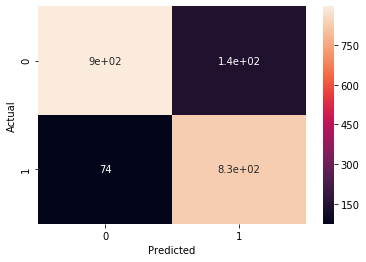

In [10]:
# Get a Confusion Matrix
import seaborn as sns
from sklearn import metrics
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      1041
           1       0.85      0.92      0.88       906

    accuracy                           0.89      1947
   macro avg       0.89      0.89      0.89      1947
weighted avg       0.89      0.89      0.89      1947



In [12]:
print(X.columns,gbc.feature_importances_)

Index(['std_half_score', 'half_sum_clicks', 'module_presentation_length',
       'b4_sum_clicks'],
      dtype='object') [0.97853659 0.00782138 0.00844612 0.00519591]


In [13]:
## Create a temporary data frame for Year 2014 Term J and Term B STEM class
tempDf2 = df[['year','term','module_domain','code_module','gender','disability','b4_sum_clicks','half_sum_clicks','std_half_score','date_registration','age_band','module_presentation_length','num_of_prev_attempts','final_result','highest_education','imd_band','studied_credits']]
tempDf2 = tempDf2.loc[(tempDf2.year ==1)&(tempDf2.module_domain==1)]
# Show first 20 observations of the dataset
tempDf2.head(20)

,year,term,module_domain,code_module,gender,disability,b4_sum_clicks,half_sum_clicks,std_half_score,date_registration,age_band,module_presentation_length,num_of_prev_attempts,final_result,highest_education,imd_band,studied_credits
3,1,0,1,3,0,0,0.0,0.0,0.000000,-38.0,2,262,1,0,3,3.0,60
7,1,0,1,2,1,0,181.0,475.0,74.325000,-110.0,0,269,0,1,2,5.0,120
10,1,1,1,3,1,0,3.0,1069.0,57.333333,-54.0,0,241,1,1,2,4.0,60
13,1,1,1,4,0,0,51.0,757.0,84.555556,-47.0,0,241,0,1,3,9.0,60
14,1,0,1,2,1,0,201.0,796.0,3.900000,-114.0,0,269,0,0,3,4.0,60
15,1,0,1,3,1,0,8.0,105.0,14.000000,-68.0,0,262,2,0,3,1.0,150
20,1,1,1,5,1,0,308.0,8316.0,81.000000,-25.0,1,241,0,1,3,2.0,90
22,1,1,1,5,0,0,0.0,0.0,0.000000,-73.0,1,241,0,0,1,0.0,60
27,1,0,1,2,0,0,28.0,1001.0,94.450000,-156.0,0,269,0,1,3,7.0,120
28,1,1,1,5,1,0,0.0,946.0,33.000000,-65.0,1,241,0,0,1,1.0,120


In [14]:
tempDf2.count()

year                          12562
term                          12562
module_domain                 12562
code_module                   12562
gender                        12562
disability                    12562
b4_sum_clicks                 12562
half_sum_clicks               12562
std_half_score                12562
date_registration             12562
age_band                      12562
module_presentation_length    12562
num_of_prev_attempts          12562
final_result                  12562
highest_education             12562
imd_band                      12562
studied_credits               12562
dtype: int64

In [15]:
tempDf2=tempDf2.dropna()

In [16]:
df2 = pd.DataFrame(tempDf2,columns= ['b4_sum_clicks','b4_sum_clicks','half_sum_clicks','module_presentation_length'])

In [17]:
X=tempDf[['std_half_score','half_sum_clicks','module_presentation_length','b4_sum_clicks']]
y=tempDf['final_result']
# Split the dataset to train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
# build and train GradientBoostingClassifier model
gbc=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
y_pred_new = gbc.predict(df2)
y_test_new=tempDf2['final_result']

In [18]:
# Print the Accuracy
from sklearn import metrics
print('Accuracy: ',metrics.accuracy_score(y_test_new, y_pred_new))

Accuracy:  0.6807037096003821


## Create a temporary data frame for Year 2013 Social Science Class

In [19]:
## Create a temporary data frame for Year 2013 Term J and Term B STEM class
tempDf2 = df[['year','term','module_domain','code_module',
             'Scotland','East Anglian Region','London Region','South Region','North Western Region','West Midlands Region',
             'South West Region','East Midlands Region','South East Region','Wales','Yorkshire Region','North Region',
             'gender','disability','b4_sum_clicks','half_sum_clicks','std_half_score','date_registration','age_band',
             'module_presentation_length','num_of_prev_attempts','final_result','highest_education','imd_band','studied_credits']]
tempDf2 = tempDf2.loc[(tempDf2.year == 0)&(tempDf2.module_domain==0)]
# Show first 20 observations of the dataset
tempDf.head(20)

,year,term,module_domain,code_module,Scotland,East Anglian Region,London Region,South Region,North Western Region,West Midlands Region,South West Region,East Midlands Region,South East Region,Wales,Yorkshire Region,North Region,gender,disability,b4_sum_clicks,half_sum_clicks,std_half_score,date_registration,age_band,module_presentation_length,num_of_prev_attempts,final_result,highest_education,imd_band,studied_credits
0,0,0,1,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.000000,-68.0,2,261,0,0,3,9.0,60
2,0,0,1,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,81.0,565.0,58.166667,-137.0,2,261,0,0,3,3.0,90
9,0,1,1,3,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.000000,-128.0,0,240,0,0,2,4.0,90
21,0,0,1,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,111.0,367.0,14.666667,-47.0,1,268,2,0,3,8.0,60
26,0,0,1,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.000000,-61.0,1,268,0,0,1,0.0,30
29,0,0,1,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,8.0,347.0,35.250000,-74.0,0,261,0,0,1,6.0,60
37,0,0,1,3,0,1,0,0,0,0,0,0,0,0,0,0,1,1,64.0,728.0,74.958333,-134.0,0,261,0,0,1,3.0,60
38,0,0,1,3,0,0,0,0,0,0,0,0,0,0,1,0,1,0,24.0,305.0,52.166667,-190.0,1,261,0,0,3,1.0,70
49,0,0,1,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,146.0,4595.0,94.333333,-31.0,0,268,0,1,1,4.0,60
51,0,0,1,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,61.0,265.0,75.416667,-96.0,0,261,0,1,2,8.0,60


In [20]:
# drop missing values
tempDf=tempDf.dropna()
tempDf.count()

year                          7786
term                          7786
module_domain                 7786
code_module                   7786
Scotland                      7786
East Anglian Region           7786
London Region                 7786
South Region                  7786
North Western Region          7786
West Midlands Region          7786
South West Region             7786
East Midlands Region          7786
South East Region             7786
Wales                         7786
Yorkshire Region              7786
North Region                  7786
gender                        7786
disability                    7786
b4_sum_clicks                 7786
half_sum_clicks               7786
std_half_score                7786
date_registration             7786
age_band                      7786
module_presentation_length    7786
num_of_prev_attempts          7786
final_result                  7786
highest_education             7786
imd_band                      7786
studied_credits     

In [21]:
# Define our predictors
X=tempDf2[['std_half_score','half_sum_clicks','module_presentation_length','b4_sum_clicks']]
y=tempDf2['final_result']

In [22]:
# Split the dataset to train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
# import machine learning algorithms
from sklearn.ensemble import GradientBoostingClassifier
# build and train GradientBoostingClassifier model
gbc=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
y_pred = gbc.predict(X_test)
print(gbc.score(X_test, y_test))

0.8559556786703602


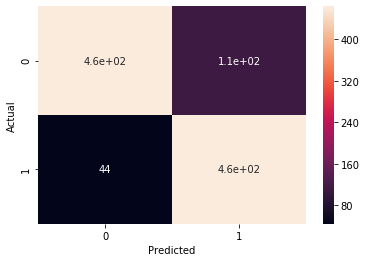

In [23]:
# Get a Confusion Matrix
import seaborn as sns
from sklearn import metrics
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86       575
           1       0.81      0.91      0.86       508

    accuracy                           0.86      1083
   macro avg       0.86      0.86      0.86      1083
weighted avg       0.86      0.86      0.86      1083

